# Sobre o notebook

A "hora da prática" é uma atividade do curso de Data Visualization: gráficos de comparação e distribuição da Alura para a escrita e teste dos códigos dos diversos desafios envolvendo os aprendizados de cada aula.

O notebook "hora da prática" é um notebook construído com espaço para as células dos desafios propostos no curso, com ele você tem espaço para construir e executar suas soluções


## Paleta de Cores

Vamos compartilhar aqui a paleta de cores que usamos durante o curso pra você executar e usar em seu projeto, mas sinta-se livre para construir a sua propria.

In [76]:
# Definindo a paleta de cores
AZUL1, AZUL2, AZUL3, AZUL4, AZUL5 = '#03045e', '#0077b6', "#00b4d8", '#90e0ef', '#CDDBF3'
CINZA1, CINZA2, CINZA3, CINZA4, CINZA5 = '#212529', '#495057', '#adb5bd', '#dee2e6', '#f8f9fa'
VERMELHO1, LARANJA1, AMARELO1, VERDE1, VERDE2 = '#e76f51', '#f4a261',	'#e9c46a', '#4c956c', '#2a9d8f'

## Aula 01 - Comparando dados

### Desafio 1

## Quais são os lucros das vendas por ano? Em qual ano obtivemos o maior lucro?

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
vendas = pd.read_csv('relatorio_vendas.csv')
vendas['data_pedido'] = pd.to_datetime(vendas['data_pedido'], format = '%Y-%m-%d')
vendas['data_envio'] = pd.to_datetime(vendas['data_envio'], format = '%Y-%m-%d')
vendas.head()

,data_pedido,data_envio,modo_envio,nome_cliente,segmento_cliente,cidade,estado,regiao,departamento,tipo_produto,preco_base,preco_unit_sem_desc,desconto,preco_unit_venda,quantidade,vendas,lucro
0,2018-11-09,2018-11-12,Econômica,Thiago Silveira,B2C,Ribeirão Preto,São Paulo,Sudeste,Materiais de construção,encanamentos,409.70,445.33,0.000,445.33,2,890.66,71.26
1,2018-11-09,2018-11-12,Econômica,Thiago Silveira,B2C,Ribeirão Preto,São Paulo,Sudeste,Materiais de construção,ferramentas,705.10,829.53,0.000,829.53,3,2488.59,373.29
2,2018-06-13,2018-06-17,Econômica,Giovanna Lima,B2B,Rio de Janeiro,Rio de Janeiro,Sudeste,Jardinagem e paisagismo,sementes,19.02,24.86,0.000,24.86,2,49.72,11.68
3,2017-10-12,2017-10-19,Entrega padrão,Ana Júlia da Cruz,B2C,Foz do Iguaçu,Paraná,Sul,Materiais de construção,materiais de revestimento,781.38,840.19,0.225,651.15,5,3255.75,-651.15
4,2017-10-12,2017-10-19,Entrega padrão,Ana Júlia da Cruz,B2C,Foz do Iguaçu,Paraná,Sul,Jardinagem e paisagismo,vasos,35.88,42.24,0.100,38.02,2,76.04,4.28


In [79]:
#criando um df com os dados desejados
df_lucro_ano = vendas.copy()
df_lucro_ano = df_lucro_ano[['data_pedido', 'lucro']]

#gerando uma coluna que agrupa os dados por ano
df_lucro_ano['ano'] = df_lucro_ano.data_pedido.dt.year
df_lucro_ano.drop(labels = 'data_pedido', axis = 1, inplace = True)

#agrupando os dados por ano
df_lucro_ano = df_lucro_ano.groupby(['ano']).aggregate('sum')

df_lucro_ano

,lucro
ano,
2016,75033.63
2017,101265.15
2018,129862.44
2019,148097.30


## Gerando o Gráfico

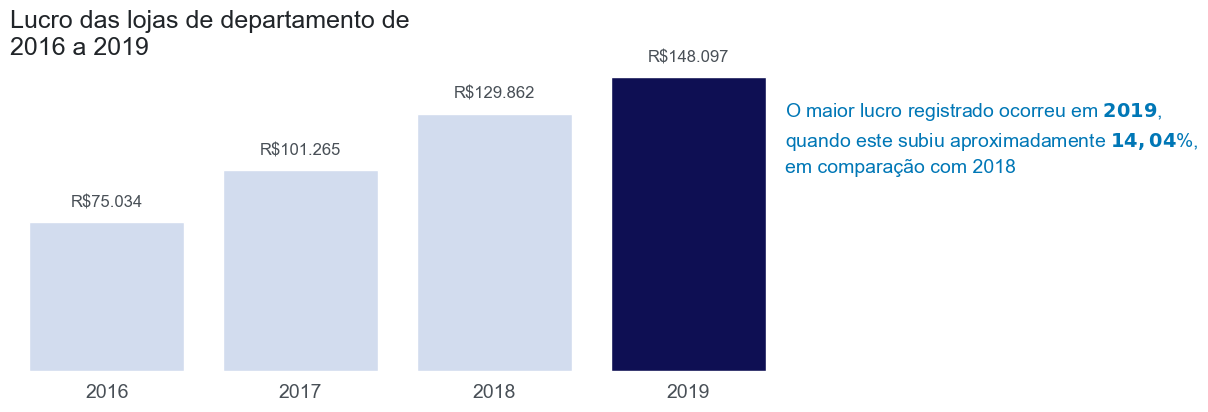

In [80]:
# Área do gráfico e tema
fig, ax = plt.subplots(figsize = (10,4))
sns.set_theme(style = 'white')

# Definindo as cores
cores = []
for ano in df_lucro_ano.index:
    if df_lucro_ano.loc[ano, 'lucro'] == df_lucro_ano['lucro'].max():
        cores.append(AZUL1)
    else:
        cores.append(AZUL5)
        
# Gerando grafico de colunas
ax = sns.barplot(data = df_lucro_ano, x = df_lucro_ano.index, y = 'lucro', palette = cores)
    
# Personalizando o Gráfico
ax.set_title('Lucro das lojas de departamento de \n2016 a 2019', loc = 'left', fontsize = 18, color = CINZA1)
ax.set_xlabel('')
ax.set_ylabel('')
ax.xaxis.set_tick_params(labelsize = 14, labelcolor = CINZA2)
sns.despine(left = True, bottom = True)

# Escrevendo os valores nas barras
ax.set_yticklabels([])
for i, valor in enumerate(df_lucro_ano['lucro']):
    qtd = f'R${valor:,.0f}'.replace(',' , '.')
    offset = 1e4
    ax.text(i, valor + offset, qtd, color = CINZA2, fontsize = 12, ha = 'center', va = 'center')


# Anotando uma conclusão
ax.text(3.5, 1e5, 'O maior lucro registrado ocorreu em $\\bf{2019}$,\n'
                    'quando este subiu aproximadamente $\\bf{14,04}$%,\n'
                    'em comparação com 2018', fontsize = 14, linespacing = 1.45, color = AZUL2)

plt.show()
    

### Desafio 2

## Qual foi o faturamento (vendas) dos top 10 produtos durante o período de 2016 a 2019 do nosso conjunto de dados? Adicione um pequeno texto falando dos 3 produtos que mais venderam.

In [81]:
#criando o dataframe
fat_produto = vendas.copy()
fat_produto = fat_produto[['tipo_produto', 'vendas']]

#Agrupando os dados por tipo, ordenando e selecionando os 10 primeiros
fat_produto = fat_produto.groupby(['tipo_produto']).agg('sum').sort_values('vendas', ascending = False)
fat_produto

#top10
top_10 = fat_produto[:10]
top_10

,vendas
tipo_produto,
pneus,1022428.97
ferramentas,995158.41
vasos,696044.18
ferramentas de jardinagem,648879.72
materiais de revestimento,629656.36
equipamentos de limpeza,542304.58
ferramentas automotivas,502109.29
peças de reposição,486907.94
encanamentos,373223.88


In [82]:
from matplotlib import transforms

def texto_colorido(x, y, texto, cores, esp = 20, ax = None, **kw):
    cores = list(reversed(cores))
    t = ax.transData
    canvas = ax.figure.canvas
    
    for i, linha in enumerate(reversed(texto.split('\n'))):
        frases = linha.split('||')
        for s, cor in zip(frases, cores[i]):
            texto = ax.text(x, y, s, color = cor, transform = t, **kw)
            texto.draw(canvas.get_renderer())
            ex = texto.get_window_extent()
            t = transforms.offset_copy(texto._transform, x = ex.width, units = 'dots')
        t = transforms.offset_copy(ax.transData, x = 0, y = (i + 1) * esp, units = 'dots')

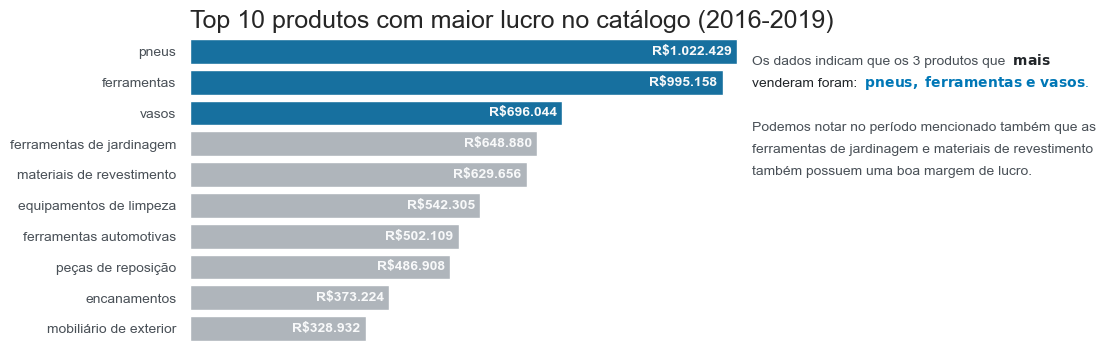

In [83]:
# Área e tema do gráfico
fig, ax = plt.subplots(figsize = (10, 4))
fig.subplots_adjust(right = 0.7)
sns.set_theme(style = 'white')

# Definindo as cores
cores = [AZUL2 if i < 3 else CINZA3 for i in range(10)]

# Gerando o gráfico de colunas
ax = sns.barplot(data = top_10, x = 'vendas', y = top_10.index, palette = cores)

# Personalizando
ax.set_title('Top 10 produtos com maior lucro no catálogo (2016-2019)', fontsize = 18, loc = 'left')
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_xticklabels([])
ax.yaxis.set_tick_params(labelsize = 10, labelcolor = CINZA2)
sns.despine(left = True, bottom = True)

# Escrevendo os valores nas barras
for i, valor in enumerate(top_10['vendas']):
    qtd = f'R${valor:,.0f}'.replace(',', '.')
    offset = 1e4
    ax.text(valor - offset, i, qtd, color = CINZA5, fontsize = 10, fontweight = 'bold', ha = 'right', va = 'center')

# Anotando uma conclusão
texto_colorido(1.05e6, 4, 'Os dados indicam que os 3 produtos que || $\\bf{mais}$\n'
                          'venderam foram: || $\\bf{pneus,\ ferramentas\ e\ vasos}$.\n'
                          '\n'
                          'Podemos notar no período mencionado também que as\n'
                          'ferramentas de jardinagem e materiais de revestimento\n'
                          'também possuem uma boa margem de lucro.',
               [[CINZA2, CINZA1],
                [CINZA1, AZUL2],
                [CINZA2],
                [CINZA2],
                [CINZA2],
                [CINZA2]], esp = 22, ax = ax, fontsize = 10)

plt.show()

## Aula 02 - Agrupando dados

### Desafio 1

## Como estão divididas as vendas das lojas de departamentos na Região Centro-Oeste nos anos de 2017 e 2018? O mesmo estado permaneceu como o que mais vendeu nesta região?

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

vendas = pd.read_csv('relatorio_vendas.csv')
vendas['data_pedido'] = pd.to_datetime(vendas['data_pedido'], format = '%Y-%m-%d')

vendas_co = vendas.copy()
vendas_co = vendas_co[['data_pedido', 'regiao', 'estado', 'vendas']]
vendas_co['ano'] = vendas_co.data_pedido.dt.year
vendas_co = vendas_co.query('regiao == "Centro-Oeste" and (ano == 2017 or ano == 2018)')
vendas_co.drop(labels = 'data_pedido', axis = 1, inplace = True)

vendas_co 

,regiao,estado,vendas,ano
26,Centro-Oeste,Distrito Federal,10483.69,2017
27,Centro-Oeste,Distrito Federal,32.70,2017
28,Centro-Oeste,Distrito Federal,422.28,2017
29,Centro-Oeste,Distrito Federal,11.10,2017
30,Centro-Oeste,Distrito Federal,293.40,2017
...,...,...,...,...
8737,Centro-Oeste,Distrito Federal,421.35,2018
8833,Centro-Oeste,Mato Grosso,289.20,2017
8884,Centro-Oeste,Distrito Federal,114.00,2018
8885,Centro-Oeste,Distrito Federal,124.92,2018


In [90]:
vendas_co = pd.crosstab(index = vendas_co.ano, columns = vendas_co.estado,
                       values = vendas_co.vendas, aggfunc = 'sum')
vendas_co

estado,Distrito Federal,Goiás,Mato Grosso,Mato Grosso do Sul
ano,,,,
2017,64308.70,66078.33,5259.46,13568.51
2018,103036.69,79801.93,10980.07,14250.02


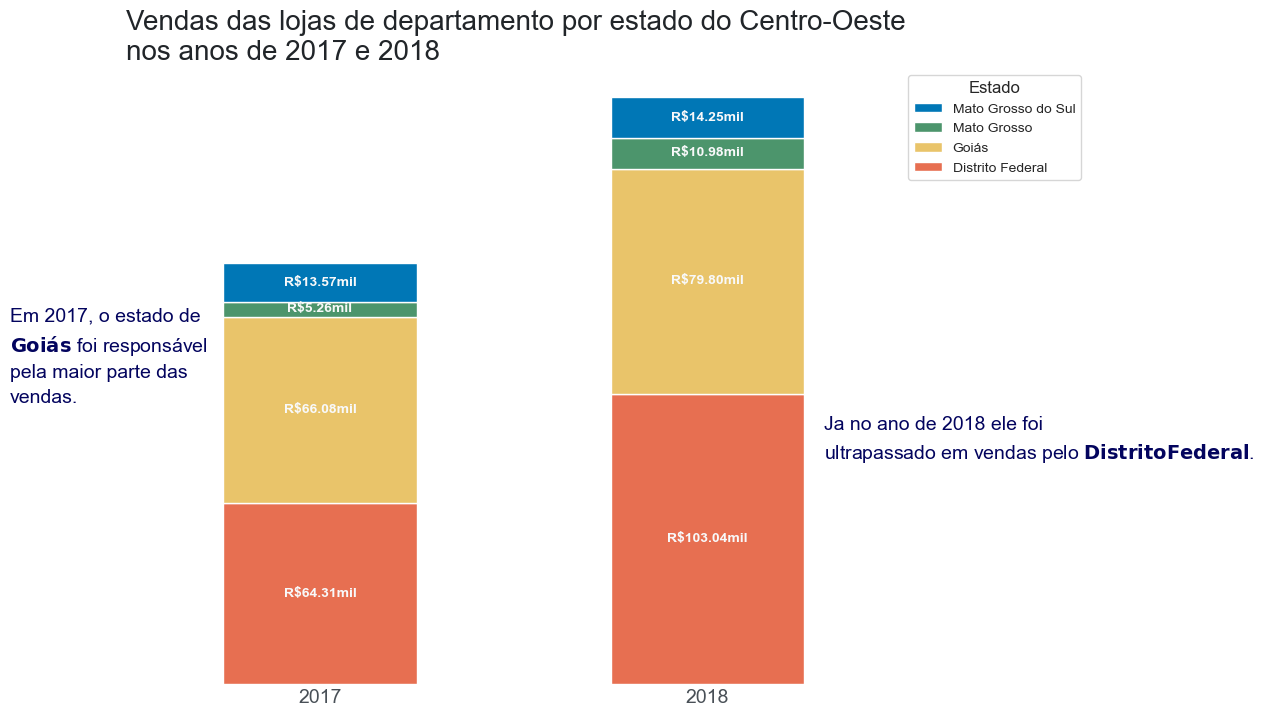

In [109]:
cores = [VERMELHO1, AMARELO1, VERDE1, AZUL2]

ax = vendas_co.plot(kind = 'bar', stacked = True, figsize = (10, 8), color = cores)

ax.set_title('Vendas das lojas de departamento por estado do Centro-Oeste\nnos anos de 2017 e 2018', loc = 'left', fontsize = 20, color = CINZA1)
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_yticklabels([])
ax.xaxis.set_tick_params(labelsize = 14, labelcolor = CINZA2, rotation = 0)
ax.set_frame_on(False)
ax.tick_params(axis = 'both', which = 'both', length = 0)

ax.legend(bbox_to_anchor = (1, 1), reverse = True, title = 'Estado', title_fontsize = 12, fontsize = 10)

for container in ax.containers:
    labels = [f'R${valor.get_height()/1000:,.2f}mil'.replace(',', '.') for valor in container]
    ax.bar_label(container, label_type = 'center', labels = labels, size = 10, color = CINZA5, fontweight = 'bold')

ax.text(-0.8, 1e5, 'Em 2017, o estado de\n'
       '$\\bf{Goiás}$ foi responsável\n'
       'pela maior parte das\n'
       'vendas.', fontsize = 14, linespacing = 1.45, color = AZUL1) 
ax.text(1.3, 8e4, 'Ja no ano de 2018 ele foi\n'
       'ultrapassado em vendas pelo $\\bf{Distrito Federal}$.',
       fontsize = 14, linespacing = 1.45, color = AZUL1)

fig = ax.get_figure()

### Desafio 2

## Analisando cada departamento, como estão divididos os modos de envio em cada um deles percentualmente?

In [141]:
envio = vendas.copy()
envio = envio[['departamento', 'modo_envio']]
envio

envio = pd.crosstab(index = envio.departamento, columns = envio.modo_envio, normalize = 'index')
envio

modo_envio,24 horas,Econômica,Entrega padrão,Envio rápido
departamento,,,,
Automotivo,0.051766,0.195493,0.593179,0.159562
Jardinagem e paisagismo,0.055504,0.190854,0.605569,0.148073
Materiais de construção,0.058133,0.202133,0.588267,0.151467


In [142]:
from matplotlib import transforms

def texto_colorido(x, y, texto, cores, esp = 20, ax = None, **kw):
    cores = list(reversed(cores))
    t = ax.transData
    canvas = ax.figure.canvas
    
    for i, linha in enumerate(reversed(texto.split('\n'))):
        frases = linha.split('||')
        for s, cor in zip(frases, cores[i]):
            texto = ax.text(x, y, s, color = cor, transform = t, **kw)
            texto.draw(canvas.get_renderer())
            ex = texto.get_window_extent()
            t = transforms.offset_copy(texto._transform, x = ex.width, units = 'dots')
            
        t = transforms.offset_copy(ax.transData, x = 0, y = (i +1) * esp, units = 'dots')

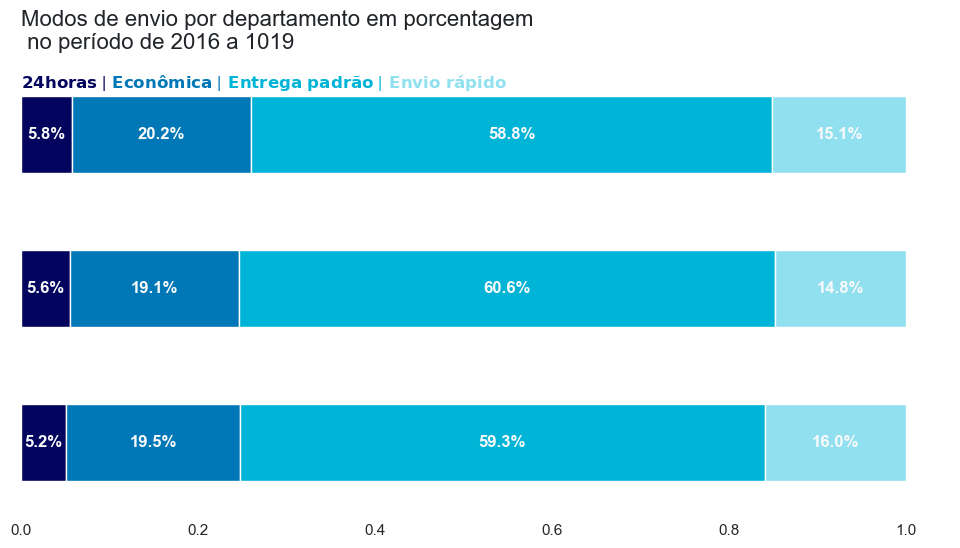

In [143]:
cores = [AZUL1, AZUL2, AZUL3, AZUL4]

ax = envio.plot(kind = 'barh', stacked = True, figsize = (12, 6), color = cores, legend = None)

ax.set_title('Modos de envio por departamento em porcentagem\n no período de 2016 a 1019', 
             fontsize = 16, loc = 'left', color = CINZA1)
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_yticklabels([])
ax.yaxis.set_tick_params(labelsize = 12, labelcolor = CINZA2)
ax.set_frame_on(False)

ax.tick_params(axis = 'both', which = 'both', length = 0)

texto_colorido(0, 2.3, '$\\bf{24 horas}$ | || $\\bf{Econômica}$ | || $\\bf{Entrega\ padrão}$ | || $\\bf{Envio\ rápido}$', cores = [cores], ax = ax, fontsize = 12)

for container in ax.containers:
    labels = [f'{valor.get_width()*100:.1f}%' for valor in container]
    ax.bar_label(container, label_type = 'center', labels = labels, size = 12, color = CINZA5, fontweight = 'bold')

fig = ax.get_figure()

## Aula 03 - Séries de tempo

### Desafio 1

In [128]:
# Importando as bibliotecas
import pandas as pd

# Importando o relatório de vendas
vendas = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/dataviz-graficos/master/dados/relatorio_vendas.csv")

# Criando um df com os dados desejados
df_depart = vendas.copy()
df_depart = df_depart[['departamento','modo_envio']]

## Criando uma tabela cruzada (crosstab) com a frequência de modos de envio por departamento
df_depart = pd.crosstab(index = df_depart.departamento, columns = df_depart.modo_envio, normalize = "index")

df_depart


modo_envio,24 horas,Econômica,Entrega padrão,Envio rápido
departamento,,,,
Automotivo,0.051766,0.195493,0.593179,0.159562
Jardinagem e paisagismo,0.055504,0.190854,0.605569,0.148073
Materiais de construção,0.058133,0.202133,0.588267,0.151467


In [129]:
# Código para gerar o texto colorido

from matplotlib import transforms

def texto_colorido(x, y, texto, cores, esp=20, ax=None, **kw):
    cores = list(reversed(cores))
    t = ax.transData
    canvas = ax.figure.canvas

    for i, linha in enumerate(reversed(texto.split('\n'))):
        frases = linha.split('||')
        for s, cor in zip(frases, cores[i]):
            texto = ax.text(x, y, s, color=cor, transform=t, **kw)
            texto.draw(canvas.get_renderer())
            ex = texto.get_window_extent()
            t = transforms.offset_copy(texto._transform, x=ex.width, 
                                       units='dots')

        t = transforms.offset_copy(ax.transData, x=0, y=(i + 1) * esp, units='dots')


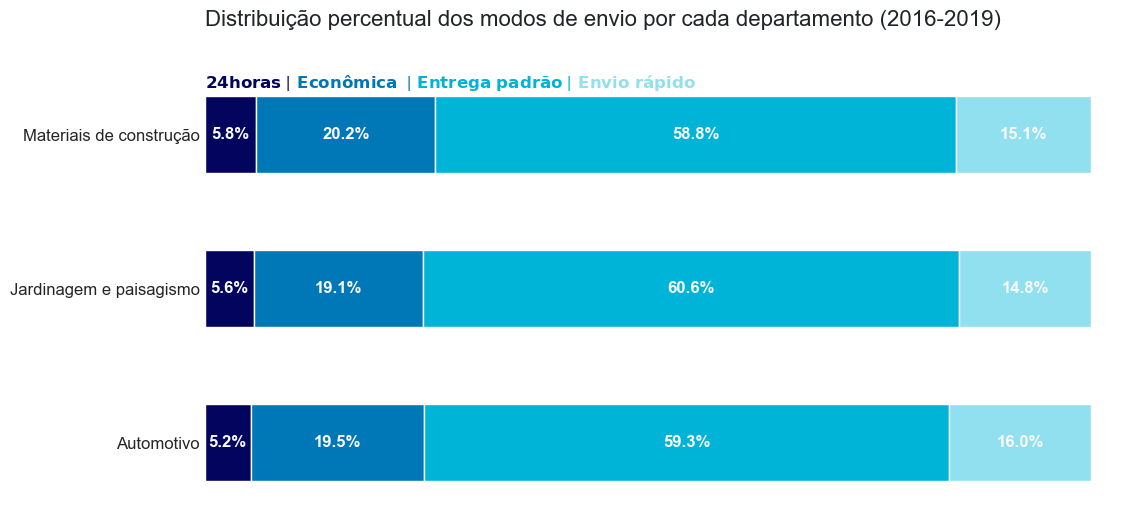

In [130]:
# Definindo as cores do gráfico
cores = [AZUL1, AZUL2, AZUL3, AZUL4]

# Gerando o gráfico de barras empilhadas 
ax = df_depart.plot(kind="barh", stacked=True, figsize=(12,6), color = cores, legend = None)
ax.set_title("Distribuição percentual dos modos de envio por cada departamento (2016-2019)\n", 
             fontsize=16, loc="left", color=CINZA1)
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_xticklabels([])
ax.yaxis.set_tick_params(labelsize=12, color = CINZA2)
ax.set_frame_on(False)

# remover todos os ticks do eixo x e y
ax.tick_params(axis='both', which='both', length=0)

# legenda dos dados
texto_colorido(0, 2.3, '$\\bf{24 horas}$ | || $\\bf{Econômica}$  | || $\\bf{Entrega\ padrão}$ | || $\\bf{Envio\ rápido}$', cores = [cores], ax=ax, fontsize=12)

# Valores das barras
for container in ax.containers:
    labels = [f'{valor.get_width()*100:.1f}%' for valor in container]
    ax.bar_label(container, label_type='center', labels = labels, size = 12, color = CINZA5, fontweight='bold')

fig = ax.get_figure()


### Desafio 2

## Aula 04 - Distribuindo dados

### Desafio 1

### Desafio 2

## Aula 05 - Explorando padrões nos dados

### Desafio 1

### Desafio 2